## Wine Quality Prediction

In [1]:
import pandas as pd

# Load the dataset to get an overview of the data
wine_data = pd.read_csv('WineQT.csv')

# Display the first few rows of the dataset to understand its structure
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Data Preprocessing

In [3]:
# Display basic information about the dataset
print(wine_data.info())

# Check for missing values
print(wine_data.isnull().sum())

# Drop unnecessary columns if any (e.g., 'Id')
wine_data = wine_data.drop(columns=['Id'])

# Convert categorical data (if any) using OneHotEncoding or LabelEncoding
# In this case, the dataset appears to have only numerical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None
fixed acidity           0
volatile acidity        0
citric acid       

## Exploratory Data Analysis (EDA)

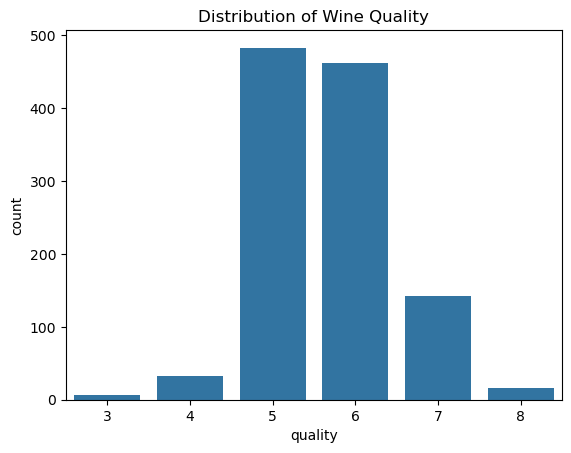

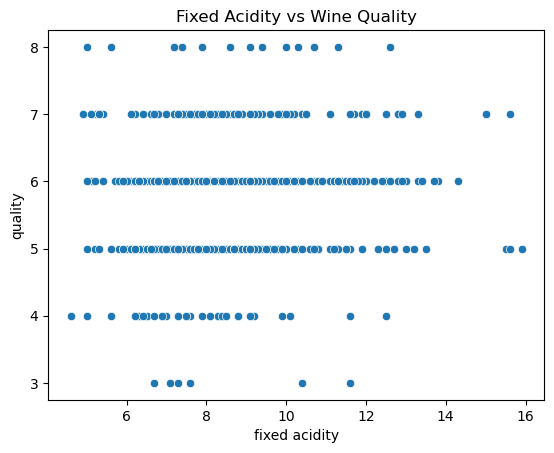

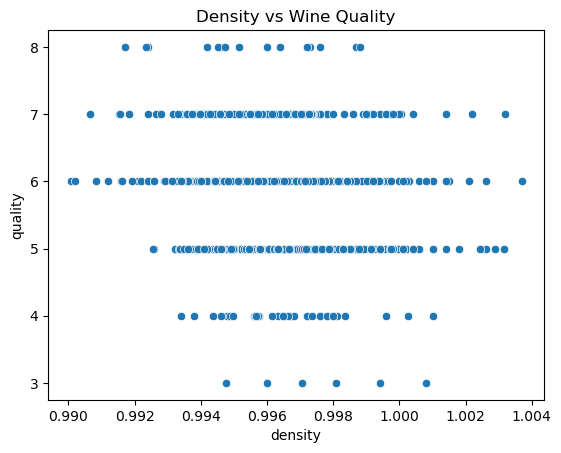

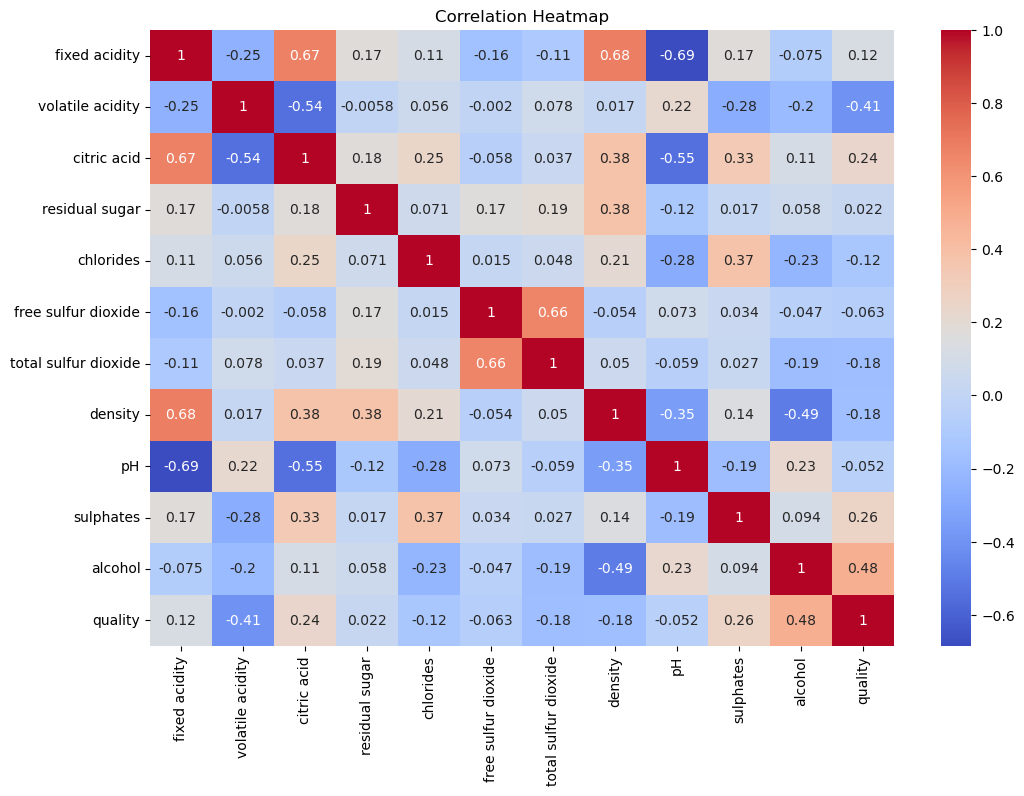

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of wine quality
sns.countplot(x='quality', data=wine_data)
plt.title('Distribution of Wine Quality')
plt.show()

# Visualize the relationship between acidity and wine quality
sns.scatterplot(x='fixed acidity', y='quality', data=wine_data)
plt.title('Fixed Acidity vs Wine Quality')
plt.show()

# Visualize the relationship between density and wine quality
sns.scatterplot(x='density', y='quality', data=wine_data)
plt.title('Density vs Wine Quality')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(wine_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## NumPy Array Operations

In [34]:
import numpy as np

# 1. Convert a Pandas DataFrame to a NumPy array
data_array = wine_data.values
print("NumPy Array:\n", data_array)

# 2. Perform basic arithmetic operations on the array
# Let's add a constant value (e.g., 1) to each element in the array
data_array_plus_one = data_array + 1
print("\nArray after adding 1 to each element:\n", data_array_plus_one)

# 3. Calculate the mean of each column
mean_per_column = np.mean(data_array, axis=0)
print("\nMean of each column:\n", mean_per_column)

# 4. Calculate the standard deviation of each column
std_per_column = np.std(data_array, axis=0)
print("\nStandard Deviation of each column:\n", std_per_column)

# 5. Perform matrix multiplication (dot product)
# For this, let's use only numerical columns (excluding the target column 'quality')
numerical_data = wine_data.drop('quality', axis=1).values
dot_product = np.dot(numerical_data.T, numerical_data)
print("\nDot product of the numerical data matrix:\n", dot_product)

# 6. Create a NumPy array of ones with the same shape as the data
ones_array = np.ones_like(data_array)
print("\nArray of ones with the same shape as data:\n", ones_array)

# 7. Reshape the array (e.g., into a 2D array with 2 columns)
reshaped_array = data_array.reshape(-1, 2)
print("\nReshaped Array (2 columns):\n", reshaped_array)

NumPy Array:
 [[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.2    0.6    0.08  ...  0.58  10.5    5.   ]
 [ 5.9    0.55   0.1   ...  0.76  11.2    6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]]

Array after adding 1 to each element:
 [[ 8.4    1.7    1.    ...  1.56  10.4    6.   ]
 [ 8.8    1.88   1.    ...  1.68  10.8    6.   ]
 [ 8.8    1.76   1.04  ...  1.65  10.8    6.   ]
 ...
 [ 7.2    1.6    1.08  ...  1.58  11.5    6.   ]
 [ 6.9    1.55   1.1   ...  1.76  12.2    7.   ]
 [ 6.9    1.645  1.12  ...  1.71  11.2    6.   ]]

Mean of each column:
 [ 8.31111111  0.53133858  0.26836395  2.53215223  0.08693263 15.61548556
 45.91469816  0.99673041  3.31101487  0.65770779 10.4421114   5.65704287]

Standard Deviation of each column:
 [1.74683037e+00 1.79554596e-01 1.96599794e-01 1.35532420e+00
 4.72466566e-02 1.02460011e+01 3.27677868e+01 1.92422483e-03
 1.56595513e-01 1

## Feature Selection and Data Splitting

In [7]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = wine_data.drop('quality', axis=1)  # Drop the target variable 'quality'
y = wine_data['quality']  # Target variable

# Display the shape of features and target variable
print("Features shape:", X.shape)
print("Target variable shape:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Features shape: (1143, 11)
Target variable shape: (1143,)
X_train shape: (800, 11)
X_test shape: (343, 11)
y_train shape: (800,)
y_test shape: (343,)


## Model Building: Random Forest, SGD, and SVC
## a. Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the model with class_weight to handle class imbalance
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         9
           5       0.69      0.77      0.73       143
           6       0.63      0.64      0.64       146
           7       0.72      0.51      0.60        41
           8       0.33      0.25      0.29         4

    accuracy                           0.66       343
   macro avg       0.40      0.36      0.37       343
weighted avg       0.64      0.66      0.65       343

Accuracy: 0.6588921282798834


## b. Stochastic Gradient Descent (SGD) Classifier

In [21]:
from sklearn.linear_model import SGDClassifier

# Initialize and train the model with class_weight to handle class imbalance
sgd_model = SGDClassifier(random_state=42, class_weight='balanced')
sgd_model.fit(X_train, y_train)

# Predictions
y_pred_sgd = sgd_model.predict(X_test)

# Evaluation
print("SGD Classifier:")
print(classification_report(y_test, y_pred_sgd, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_sgd))

SGD Classifier:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         9
           5       0.00      0.00      0.00       143
           6       0.43      0.72      0.54       146
           7       0.50      0.54      0.52        41
           8       0.00      0.00      0.00         4

    accuracy                           0.37       343
   macro avg       0.15      0.21      0.18       343
weighted avg       0.24      0.37      0.29       343

Accuracy: 0.37026239067055394


## c. Support Vector Classifier (SVC)

In [15]:
from sklearn.svm import SVC

# Initialize and train the model with class_weight to handle class imbalance
svc_model = SVC(random_state=42, class_weight='balanced')
svc_model.fit(X_train, y_train)

# Predictions
y_pred_svc = svc_model.predict(X_test)

# Evaluation
print("Support Vector Classifier (SVC):")
print(classification_report(y_test, y_pred_svc, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))

Support Vector Classifier (SVC):
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         9
           5       0.65      0.21      0.32       143
           6       0.49      0.29      0.36       146
           7       0.20      0.37      0.26        41
           8       0.00      0.00      0.00         4

    accuracy                           0.25       343
   macro avg       0.22      0.14      0.16       343
weighted avg       0.50      0.25      0.32       343

Accuracy: 0.2536443148688047


## Visualization of Model Performance

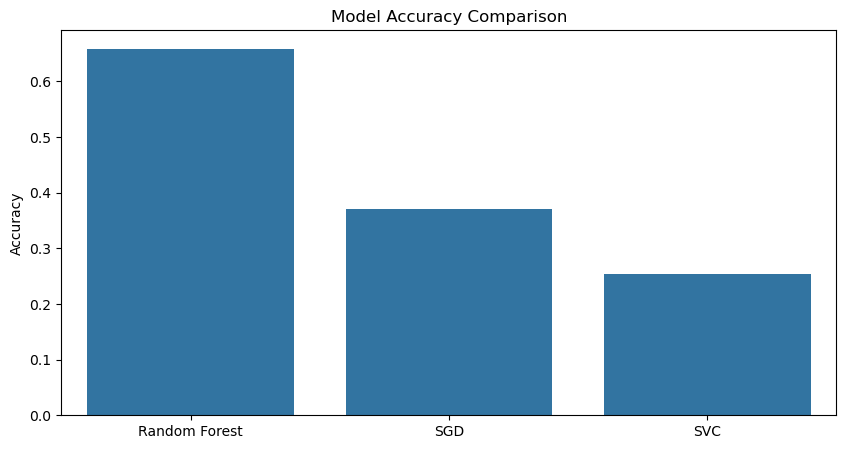

In [23]:
# Visualization of accuracy comparison
models = ['Random Forest', 'SGD', 'SVC']
accuracies = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_sgd), accuracy_score(y_test, y_pred_svc)]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()